Overall Mean WER: 7.333333333333333
Overall Std Dev WER: 1.8708286933869707


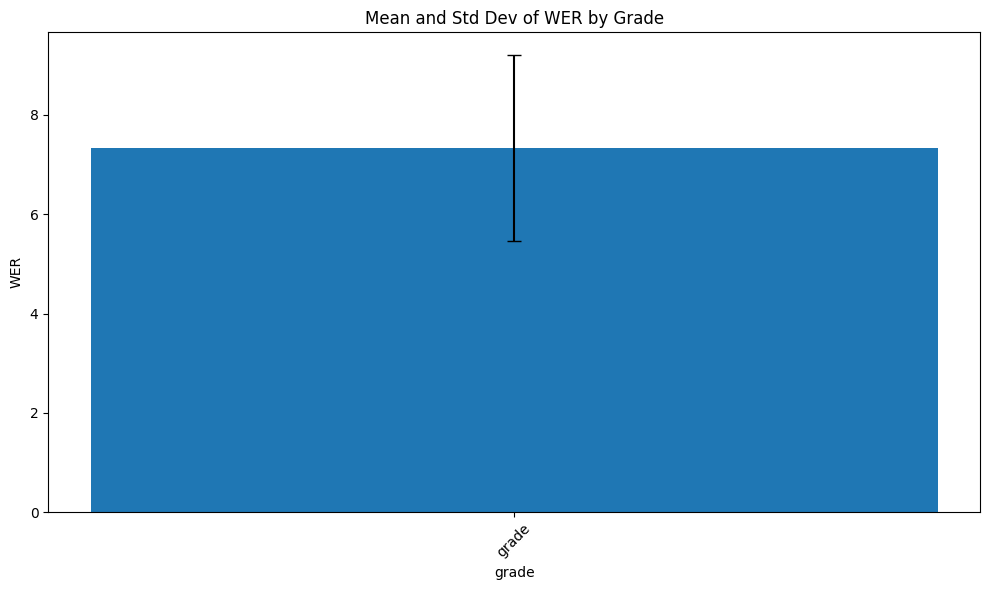

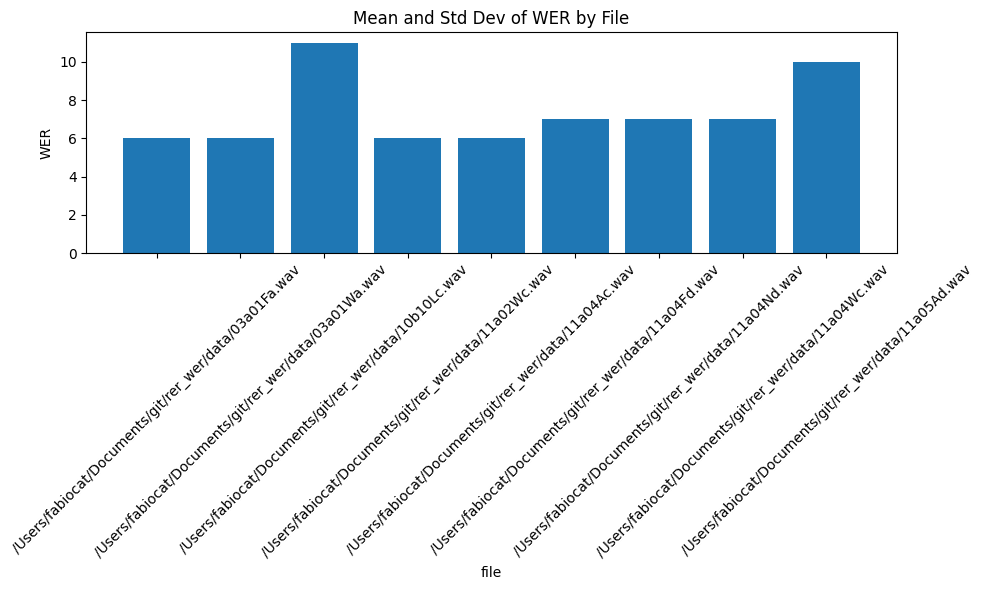

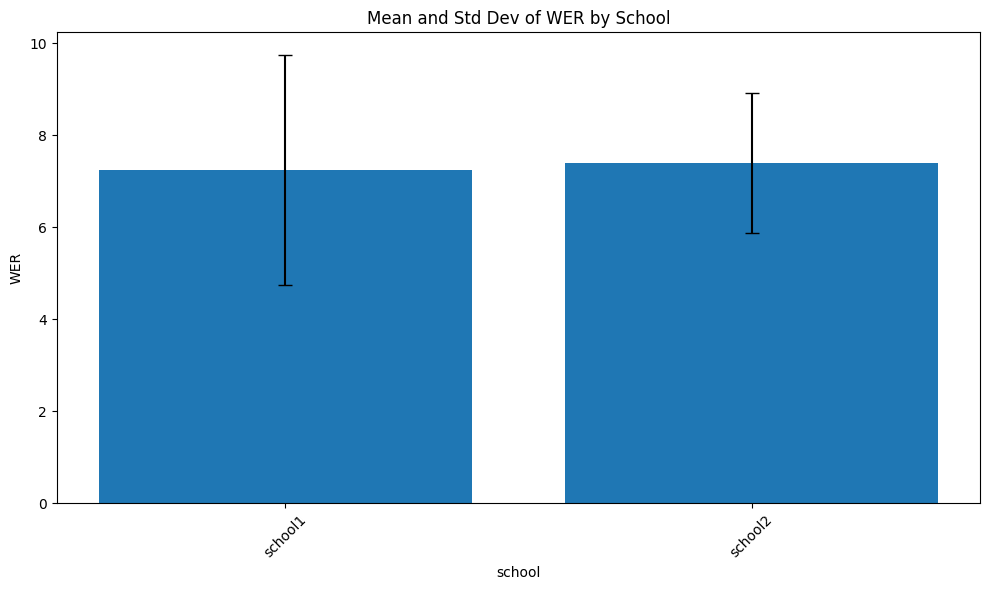

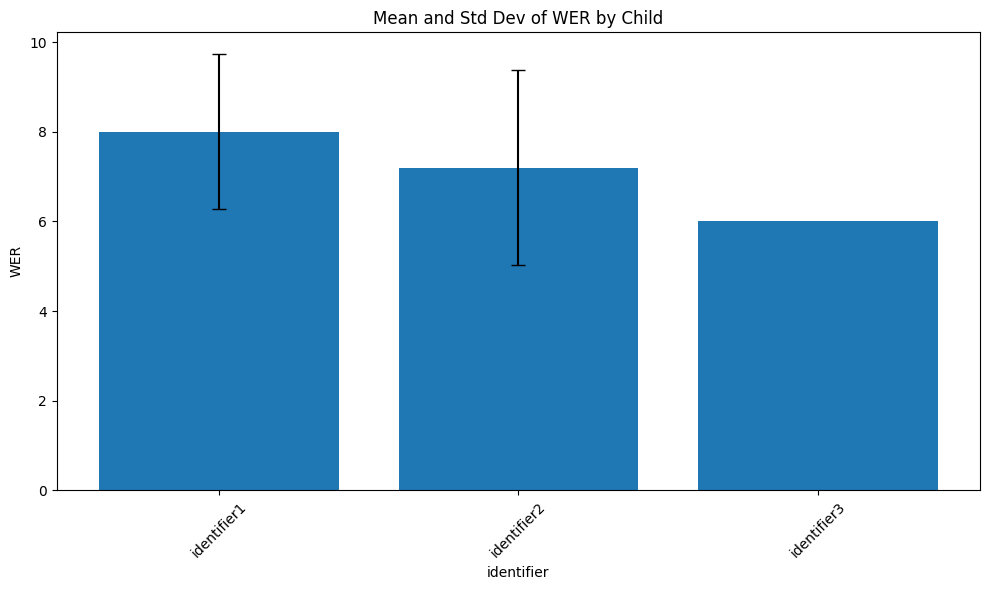

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#output_file = "/net/vast-storage.ib.cluster/scratch/scratch/Mon/fabiocat/rer_wer/data/output.csv"
output_file = "../../data/output.csv"

df_output = pd.read_csv(output_file)

# Overall mean and standard deviation of WER
overall_mean_wer = df_output['wer'].mean()
overall_stdev_wer = df_output['wer'].std()

# Mean and standard deviation of WER by grade
wer_by_grade = df_output.groupby('grade')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by school
wer_by_school = df_output.groupby('school')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by file
wer_by_file = df_output.groupby('file')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by child
wer_by_child = df_output.groupby('identifier')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by child and then by school
wer_by_child_school = df_output.groupby(['identifier', 'school'])['wer'].agg(['mean', 'std']).reset_index()

# Filtering for entries with score > 0.5
df_filtered = df_output[df_output['score'] > 0.5]

# Overall mean and standard deviation of WER for score > 0.5
overall_mean_wer_filtered = df_filtered['wer'].mean()
overall_stdev_wer_filtered = df_filtered['wer'].std()

# Mean and standard deviation of WER by grade for score > 0.5
wer_by_grade_filtered = df_filtered.groupby('grade')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by school for score > 0.5
wer_by_school_filtered = df_filtered.groupby('school')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by child for score > 0.5
wer_by_child_filtered = df_filtered.groupby('file')['wer'].agg(['mean', 'std']).reset_index()

# Mean and standard deviation of WER by child and then by school for score > 0.5
wer_by_child_school_filtered = df_filtered.groupby(['file', 'school'])['wer'].agg(['mean', 'std']).reset_index()

# Plotting
def plot_stats(df, title, xlabel):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(df[xlabel], df['mean'], yerr=df['std'], capsize=5)
    ax.set_title(f'Mean and Std Dev of WER by {title}')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('WER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Overall WER stats
print(f"Overall Mean WER: {overall_mean_wer}")
print(f"Overall Std Dev WER: {overall_stdev_wer}")

# Plotting for different groupings
plot_stats(wer_by_grade, 'Grade', 'grade')
plot_stats(wer_by_file, 'File', 'file')
plot_stats(wer_by_school, 'School', 'school')
plot_stats(wer_by_child, 'Child', 'identifier')

In [2]:
df_output

,file,school,grade,score,identifier,expected_text,transcription,wer
0,/Users/fabiocat/Documents/git/rer_wer/data/03a...,school1,grade,1,identifier3,expecteda,der latten liegt auf dem eisschrank,6.0
1,/Users/fabiocat/Documents/git/rer_wer/data/03a...,school1,grade,1,identifier2,expecteds,der latten liegt auf dem eisrank,6.0
2,/Users/fabiocat/Documents/git/rer_wer/data/10b...,school1,grade,1,identifier2,expectedd,wir werden auf dem platz sein wo wir sie immer...,11.0
3,/Users/fabiocat/Documents/git/rer_wer/data/11a...,school1,grade,1,identifier2,expectedd,das will sie am mittwoch abgeben,6.0
4,/Users/fabiocat/Documents/git/rer_wer/data/11a...,school2,grade,1,identifier2,expectedd,heute abend könnt ihrs im sagen,6.0
5,/Users/fabiocat/Documents/git/rer_wer/data/11a...,school2,grade,1,identifier2,expectedd,heute haben könntig er sie ihm sagen,7.0
6,/Users/fabiocat/Documents/git/rer_wer/data/11a...,school2,grade,1,identifier1,expected1,heute abend könnt ich es ihm sagen,7.0
7,/Users/fabiocat/Documents/git/rer_wer/data/11a...,school2,grade,1,identifier1,expected1,heute abend könnt ihr hier zum sagen,7.0
8,/Users/fabiocat/Documents/git/rer_wer/data/11a...,school2,grade,1,identifier1,expected1,das schwarze blöppier befindet sich da oben ne...,10.0
